In [4]:
import copy
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import math

In [67]:
acc_list = ['../shared/results/Accuracy/[2021-08-27]Acc_Orth_Acc0.9739Dmax400Dens0.0003CU10P100.0.npy',
            '../shared/results/Accuracy/[2021-08-30]Acc_Orth_Acc0.9765Dmax400Dens0.0003CU50P100.0.npy',
            '../shared/results/Accuracy/[2021-08-26]Acc_Orth_Acc0.9847Dmax400Dens0.0003CU200P100.0.npy',
            '../shared/results/Accuracy/[2021-08-30]Acc_Orth_Acc0.9825Dmax400Dens0.0003CU400P100.0.npy',
            '../shared/results/Accuracy/[2021-08-29]Acc_TCI_Orth_Acc0.3823650597445406Dmax400Dens0.0003CU400P100.0.npy']
env_list = ['../shared/results/Simulation_Env/[2021-08-27]SimEnv_Orth_Acc0.9739Dmax400Dens0.0003CU10P100.0.npz',
            '../shared/results/Simulation_Env/[2021-08-30]SimEnv_Orth_Acc0.9765Dmax400Dens0.0003CU50P100.0.npz',
            '../shared/results/Simulation_Env/[2021-08-26]SimEnv_Orth_Acc0.9847Dmax400Dens0.0003CU200P100.0.npz',
            '../shared/results/Simulation_Env/[2021-08-30]SimEnv_Orth_Acc0.9825Dmax400Dens0.0003CU400P100.0.npz',
            '../shared/results/Simulation_Env/[2021-08-29]SimEnv_TCI_Orth_Acc0.3823650597445406Dmax400Dens0.0003CU400P100.0.npz']
rho_list = ['../shared/results/RHO/[2021-08-27]RHO_Orth_Acc0.9739Dmax400Dens0.0003CU10P100.0.npy',
            '../shared/results/RHO/[2021-08-30]RHO_Orth_Acc0.9765Dmax400Dens0.0003CU50P100.0.npy',
            '../shared/results/RHO/[2021-08-26]RHO_Orth_Acc0.9847Dmax400Dens0.0003CU200P100.0.npy',
            '../shared/results/RHO/[2021-08-30]RHO_Orth_Acc0.9825Dmax400Dens0.0003CU400P100.0.npy',
            '../shared/results/RHO/[2021-08-29]RHO_TCI_Orth_Acc0.3823650597445406Dmax400Dens0.0003CU400P100.0.npy']

legend_list = ['Proposed, $|\mathcal{M}_0|=10$','Proposed, $|\mathcal{M}_0|=50$','Proposed, $|\mathcal{M}_0|=200$', 'Proposed, $|\mathcal{M}_0|=400$', 'TCI, $|\mathcal{M}_0|=400$','test']

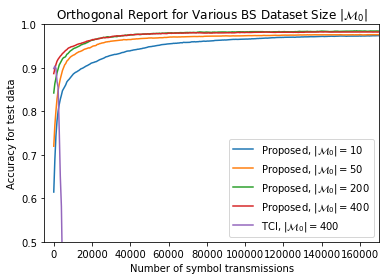

In [68]:
for i in range(len(acc_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']    
    acc_history = np.load(acc_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), acc_history[:epoch_max], label=legend_list[i])    
    
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Accuracy for test data')
plt.legend(loc='lower right')
plt.title('Orthogonal Report for Various BS Dataset Size $|\mathcal{M}_0|$')
plt.axis([-5000, 170000, 0.5, 1])
plt.show()

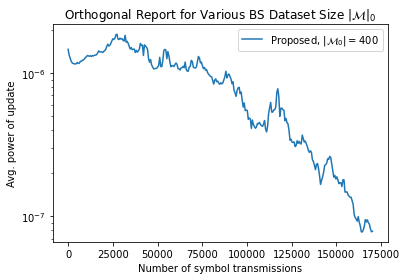

In [9]:
for i in range(len(rho_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']    
    rho_history = np.load(rho_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), rho_history, label=legend_list[i])        
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Avg. power of update')
plt.yscale("log")
plt.legend(loc='upper right')
plt.title('Orthogonal Report for Various BS Dataset Size $|\mathcal{M}|_0$')
plt.show()

In [20]:
acc_list = ['../shared/results/Accuracy/[2021-08-29]Acc_Orth_Acc0.858Dmax0Dens0.0003CU200P100.0.npy',
            '../shared/results/Accuracy/[2021-08-29]Acc_Orth_Acc0.9358Dmax150Dens0.0003CU200P100.0.npy',
            '../shared/results/Accuracy/[2021-08-29]Acc_Orth_Acc0.9825Dmax300Dens0.0003CU200P100.0.npy',
           '../shared/results/Accuracy/[2021-08-30]Acc_Orth_Acc0.9839Dmax550Dens0.0003CU200P100.0.npy',
           '../shared/results/Accuracy/[2021-08-30]Acc_TCI_Orth_Acc0.098Dmax150Dens0.0003CU200P100.0.npy',
           '../shared/results/Accuracy/[2021-08-30]Acc_TCI_Orth_Acc0.098Dmax300Dens0.0003CU200P100.0.npy',
           '../shared/results/Accuracy/[2021-08-30]Acc_TCI_Orth_Acc0.1141Dmax550Dens0.0003CU200P100.0.npy']
env_list = ['../shared/results/Simulation_Env/[2021-08-29]SimEnv_Orth_Acc0.858Dmax0Dens0.0003CU200P100.0.npz',
           '../shared/results/Simulation_Env/[2021-08-29]SimEnv_Orth_Acc0.9358Dmax150Dens0.0003CU200P100.0.npz',
            '../shared/results/Simulation_Env/[2021-08-29]SimEnv_Orth_Acc0.9825Dmax300Dens0.0003CU200P100.0.npz',
           '../shared/results/Simulation_Env/[2021-08-30]SimEnv_Orth_Acc0.9839Dmax550Dens0.0003CU200P100.0.npz',
           '../shared/results/Simulation_Env/[2021-08-30]SimEnv_TCI_Orth_Acc0.098Dmax150Dens0.0003CU200P100.0.npz',
           '../shared/results/Simulation_Env/[2021-08-30]SimEnv_TCI_Orth_Acc0.098Dmax300Dens0.0003CU200P100.0.npz',
           '../shared/results/Simulation_Env/[2021-08-30]SimEnv_TCI_Orth_Acc0.1141Dmax550Dens0.0003CU200P100.0.npz']
rho_list = ['../shared/results/RHO/[2021-08-29]RHO_Orth_Acc0.858Dmax0Dens0.0003CU200P100.0.npy',
           '../shared/results/RHO/[2021-08-29]RHO_Orth_Acc0.9358Dmax150Dens0.0003CU200P100.0.npy',
            '../shared/results/RHO/[2021-08-29]RHO_Orth_Acc0.9825Dmax300Dens0.0003CU200P100.0.npy',
           '../shared/results/RHO/[2021-08-30]RHO_Orth_Acc0.9839Dmax550Dens0.0003CU200P100.0.npy',
           '../shared/results/RHO/[2021-08-30]RHO_TCI_Orth_Acc0.098Dmax150Dens0.0003CU200P100.0.npy',
           '../shared/results/RHO/[2021-08-30]RHO_TCI_Orth_Acc0.098Dmax300Dens0.0003CU200P100.0.npy',
           '../shared/results/RHO/[2021-08-30]RHO_TCI_Orth_Acc0.1141Dmax550Dens0.0003CU200P100.0.npy']

legend_list = ['No federation, Coverage: 0m', 'Proposed, Coverage: 150m', 'Proposed, Coverage: 300m','Proposed, Coverage: 550m',  'TCI, Coverage: 150m', 'TCI, Coverage: 300m', 'TCI, Coverage: 550m']

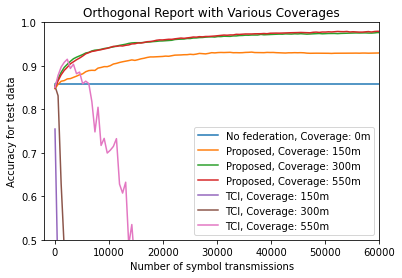

In [21]:
env = np.load(env_list[0])
epoch_max = env['epoch_max']
N = env['N']    
acc_history = np.load(acc_list[0])
plt.plot(np.arange(0,N*epoch_max, N ), np.ones(epoch_max)*acc_history[epoch_max-1], label=legend_list[0])  

for i in range(1,len(acc_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']    
    acc_history = np.load(acc_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), acc_history[:epoch_max], label=legend_list[i])    
    
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Accuracy for test data')
plt.legend(loc='lower right')
plt.title('Orthogonal Report with Various Coverages')
plt.axis([-2000, 60000, 0.5, 1])
plt.show()

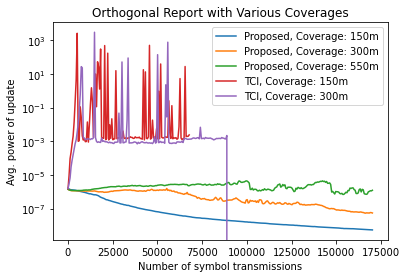

In [35]:
for i in range(1,len(rho_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']    
    rho_history = np.load(rho_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), rho_history[:epoch_max], label=legend_list[i])        
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Avg. power of update')
plt.yscale("log")
plt.legend(loc='upper right')
plt.title('Orthogonal Report with Various Coverages')
plt.show()

In [23]:
acc_list = ['../shared/results/Accuracy/[2021-08-30]Acc_Orth_Acc0.9721Dmax400Dens0.0003CU200P10.0.npy',
            '../shared/results/Accuracy/[2021-08-26]Acc_Orth_Acc0.9847Dmax400Dens0.0003CU200P100.0.npy',
            '../shared/results/Accuracy/[2021-08-30]Acc_Orth_Acc0.9876Dmax400Dens0.0003CU200P1000.0.npy',
           '../shared/results/Accuracy/[2021-08-30]Acc_TCI_Orth_Acc0.16537820221312718Dmax400Dens0.0003CU200P100.0.npy',
           '../shared/results/Accuracy/[2021-08-31]Acc_TCI_Orth_Acc0.151Dmax400Dens0.0003CU200P1000.0.npy']
env_list = ['../shared/results/Simulation_Env/[2021-08-30]SimEnv_Orth_Acc0.9721Dmax400Dens0.0003CU200P10.0.npz',
            '../shared/results/Simulation_Env/[2021-08-26]SimEnv_Orth_Acc0.9847Dmax400Dens0.0003CU200P100.0.npz',
            '../shared/results/Simulation_Env/[2021-08-30]SimEnv_Orth_Acc0.9876Dmax400Dens0.0003CU200P1000.0.npz',
           '../shared/results/Simulation_Env/[2021-08-30]SimEnv_TCI_Orth_Acc0.16537820221312718Dmax400Dens0.0003CU200P100.0.npz',
           '../shared/results/Simulation_Env/[2021-08-31]SimEnv_TCI_Orth_Acc0.151Dmax400Dens0.0003CU200P1000.0.npz']
rho_list = ['../shared/results/RHO/[2021-08-30]RHO_Orth_Acc0.9721Dmax400Dens0.0003CU200P10.0.npy',
            '../shared/results/RHO/[2021-08-26]RHO_Orth_Acc0.9847Dmax400Dens0.0003CU200P100.0.npy',
            '../shared/results/RHO/[2021-08-30]RHO_Orth_Acc0.9876Dmax400Dens0.0003CU200P1000.0.npy',
           '../shared/results/RHO/[2021-08-30]RHO_TCI_Orth_Acc0.16537820221312718Dmax400Dens0.0003CU200P100.0.npy',
           '../shared/results/RHO/[2021-08-31]RHO_TCI_Orth_Acc0.151Dmax400Dens0.0003CU200P1000.0.npy']

legend_list = ['Proposed, $P=10$dBm','Proposed, $P=20$dBm', 'Proposed, $P=30$dBm', 'TCI, $P=20$dBm', 'TCI, $P=30$dBm', 'TCI, $P=10$dBm']

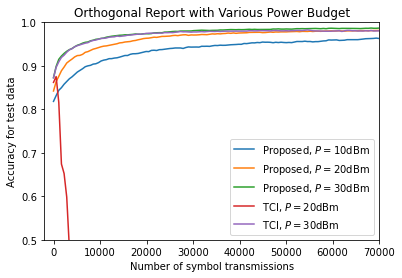

In [26]:
for i in range(len(acc_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']    
    acc_history = np.load(acc_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), acc_history[:epoch_max], label=legend_list[i])    
    
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Accuracy for test data')
plt.legend(loc='lower right')
plt.axis([-2000, 70000, 0.5, 1])
plt.title('Orthogonal Report with Various Power Budget')
plt.show()

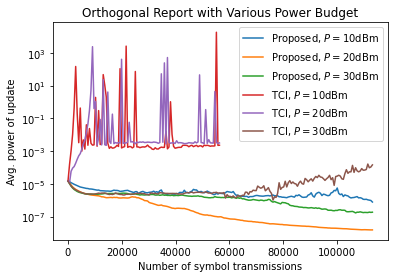

In [10]:
for i in range(len(rho_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']    
    rho_history = np.load(rho_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), rho_history, label=legend_list[i])        
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Avg. power of update')
plt.yscale("log")
plt.legend(loc='upper right')
plt.title('Orthogonal Report with Various Power Budget')
plt.show()

## Compressed Report

In [79]:
acc_list = ['../shared/results/Accuracy/[2021-08-26]Acc_Orth_Acc0.9847Dmax400Dens0.0003CU200P100.0.npy',
           '../shared/results/Accuracy/[2021-09-01]Acc_CS_Acc0.8777CmpRate0.8Dmax400CU200P100.0.npy',
            '../shared/results/Accuracy/[2021-09-01]Acc_CS_Acc0.8645CmpRate0.4Dmax400CU200P100.0.npy',
           '../shared/results/Accuracy/[2021-09-06]Acc_CS_Acc0.8659CmpRate0.1Dmax400CU200P100.0.npy',
           '../shared/results/Accuracy/[2021-09-02]Acc_CS_TCI_Acc0.8666CmpRate0.8Dmax400CU200P100.0.npy',
           '../shared/results/Accuracy/[2021-09-04]Acc_CS_Acc0.8737CmpRate0.4Dmax400CU200P100.0.npy',
           '../shared/results/Accuracy/[2021-09-03]Acc_CS_TCI_Acc0.8688CmpRate0.1Dmax400CU200P100.0.npy',
           '../shared/results/Accuracy/[2021-08-11]Acc_CS_Acc0.8714CmpRate0.1Dmax400CU200P100.0.npy']
env_list = ['../shared/results/Simulation_Env/[2021-08-26]SimEnv_Orth_Acc0.9847Dmax400Dens0.0003CU200P100.0.npz',
           '../shared/results/Simulation_Env/[2021-09-01]Sim_CS_Acc0.8777CmpRate0.8Dmax400CU200P100.0.npz',
            '../shared/results/Simulation_Env/[2021-09-01]Sim_CS_Acc0.8645CmpRate0.4Dmax400CU200P100.0.npz',
           '../shared/results/Simulation_Env/[2021-09-06]Sim_CS_Acc0.8659CmpRate0.1Dmax400CU200P100.0.npz',
           '../shared/results/Simulation_Env/[2021-09-02]Sim_CS_TCI_Acc0.8666CmpRate0.8Dmax400CU200P100.0.npz',
           '../shared/results/Simulation_Env/[2021-09-04]Sim_CS_Acc0.8737CmpRate0.4Dmax400CU200P100.0.npz',
           '../shared/results/Simulation_Env/[2021-09-03]Sim_CS_TCI_Acc0.8688CmpRate0.1Dmax400CU200P100.0.npz',
           '../shared/results/Simulation_Env/[2021-08-11]Sim_CS_Acc0.8714CmpRate0.1Dmax400CU200P100.0.npz']
rho_list = ['../shared/results/RHO/[2021-08-26]RHO_Orth_Acc0.9847Dmax400Dens0.0003CU200P100.0.npy',
           '../shared/results/RHO/[2021-09-01]RHO_CS_Acc0.8777CmpRate0.8Dmax400CU200P100.0.npy',
            '../shared/results/RHO/[2021-09-01]RHO_CS_Acc0.8645CmpRate0.4Dmax400CU200P100.0.npy',
           '../shared/results/RHO/[2021-09-01]RHO_CS_Acc0.8605CmpRate0.1Dmax400CU200P100.0.npy',
           '../shared/results/RHO/[2021-09-02]RHO_CS_TCI_Acc0.8666CmpRate0.8Dmax400CU200P100.0.npy',
           '../shared/results/RHO/[2021-09-04]RHO_CS_Acc0.8737CmpRate0.4Dmax400CU200P100.0.npy',
           '../shared/results/RHO/[2021-09-03]RHO_CS_TCI_Acc0.8688CmpRate0.1Dmax400CU200P100.0.npy',
           '../shared/results/RHO/[2021-08-11]RHO_CS_Acc0.8714CmpRate0.1Dmax400CU200P100.0.npy']
legend_list = ['Orthogonal Report, $F/F_{org}=1$ ', 'Compressed Report, $F/F_{org}=0.8$ ', 'Compressed Report, $F/F_{org}=0.4$', 'Compressed Report, $F/F_{org}=0.1$', 'Compressed Report with TCI, $F/F_{org}=0.8$', 'Compressed Report with TCI, $F/F_{org}=0.4$', 'Compressed Report with TCI, $F/F_{org}=0.1$', 'No Pretraining']
linestyle = ['-k', '-r', '-g', '-b', '--k', '--r', '--g', '--b']

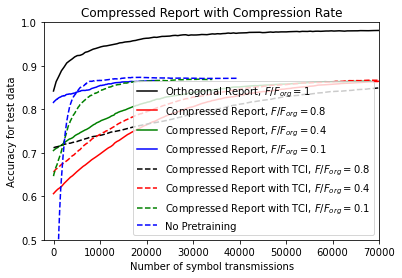

In [80]:
for i in range(len(acc_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']   
    acc_history = np.load(acc_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), acc_history[:epoch_max],linestyle[i],label=legend_list[i]) 

    
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Accuracy for test data')
plt.legend(loc='lower right')
plt.axis([-2000, 70000, 0.5, 1])
plt.title('Compressed Report with Compression Rate')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (395,) and (300,)

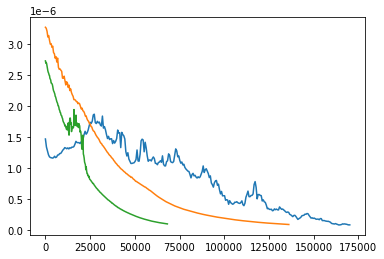

In [35]:
for i in range(len(rho_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']    
    rho_history = np.load(rho_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), rho_history[:epoch_max], label=legend_list[i])        
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Avg. power of update')
plt.yscale("log")
plt.legend(loc='upper right')
plt.title('Compressed Report with Various Shared Sample Sizes')
plt.show()

In [44]:
acc_list = ['../shared/results/Accuracy/[2021-08-29]Acc_Orth_Acc0.858Dmax0Dens0.0003CU200P100.0.npy',
           '../shared/results/Accuracy/[2021-09-07]Acc_CS_Acc0.8694CmpRate0.1Dmax150CU200P100.0.npy',
           '../shared/results/Accuracy/[2021-09-08]Acc_CS_Acc0.8752CmpRate0.1Dmax300CU200P100.0.npy']
env_list = ['../shared/results/Simulation_Env/[2021-08-29]SimEnv_Orth_Acc0.858Dmax0Dens0.0003CU200P100.0.npz',
           '../shared/results/Simulation_Env/[2021-09-07]Sim_CS_Acc0.8694CmpRate0.1Dmax150CU200P100.0.npz',
           '../shared/results/Simulation_Env/[2021-09-07]Sim_CS_Acc0.8752CmpRate0.1Dmax300CU200P100.0.npz']
rho_list = ['../shared/results/RHO/[2021-08-29]RHO_Orth_Acc0.858Dmax0Dens0.0003CU200P100.0.npy',
           '../shared/results/RHO/[2021-09-07]RHO_CS_Acc0.8694CmpRate0.1Dmax150CU200P100.0.npy',
           '../shared/results/RHO/[2021-09-07]RHO_CS_Acc0.8752CmpRate0.1Dmax300CU200P100.0.npy']
legend_list = ['Coverage: 0m', 'Proposed, Coverage: 150m', 'Proposed, Coverage: 300m', 'Proposed, Coverage: 550m', 'TCI, Coverage: 150m', 'TCI, Coverage: 300m', 'TCI, Coverage: 550m']

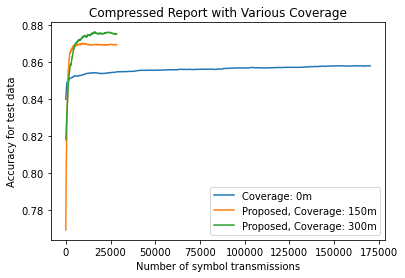

In [46]:
for i in range(len(acc_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']    
    acc_history = np.load(acc_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), acc_history[:epoch_max], label=legend_list[i])    
    
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Accuracy for test data')
plt.legend(loc='lower right')
plt.title('Compressed Report with Various Coverage')
#plt.axis([-2000, 28000, 0, 1])
plt.show()

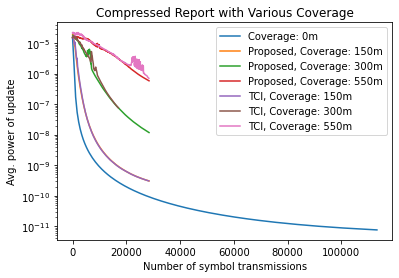

In [16]:
for i in range(len(rho_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']    
    rho_history = np.load(rho_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), rho_history[:epoch_max], label=legend_list[i])        
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Avg. power of update')
plt.yscale("log")
plt.legend(loc='upper right')
plt.title('Compressed Report with Various Coverage')
plt.show()

In [17]:
acc_list = ['../shared/results/Accuracy/[2021-08-19]Acc_CS_Acc0.8776CmpRate0.1Dmax400CU200P10.0.npy',
            '../shared/results/Accuracy/[2021-08-11]Acc_CS_Acc0.8714CmpRate0.1Dmax400CU200P100.0.npy',
           '../shared/results/Accuracy/[2021-08-21]Acc_CS_Acc0.8732CmpRate0.1Dmax400CU200P1000.0.npy',
            '../shared/results/Accuracy/[2021-08-25]Acc_CS_TCI_Acc0.8827CmpRate0.1Dmax400CU200P10.0.npy',
           '../shared/results/Accuracy/[2021-08-08]Acc_CS_TCI_Acc1.7656CmpRate0.1Dmax400CU200P100.0.npy',
           '../shared/results/Accuracy/[2021-08-21]Acc_CS_TCI_Acc0.8754CmpRate0.1Dmax400CU200P1000.0.npy']
env_list = ['../shared/results/Simulation_Env/[2021-08-19]Sim_CS_Acc0.8776CmpRate0.1Dmax400CU200P10.0.npz',
            '../shared/results/Simulation_Env/[2021-08-11]Sim_CS_Acc0.8714CmpRate0.1Dmax400CU200P100.0.npz',
           '../shared/results/Simulation_Env/[2021-08-21]Sim_CS_Acc0.8732CmpRate0.1Dmax400CU200P1000.0.npz',
            '../shared/results/Simulation_Env/[2021-08-25]Sim_CS_TCI_Acc0.8827CmpRate0.1Dmax400CU200P10.0.npz',
           '../shared/results/Simulation_Env/[2021-08-08]Sim_CS_TCI_Acc1.7656CmpRate0.1Dmax400CU200P100.0.npz',
           '../shared/results/Simulation_Env/[2021-08-21]Sim_CS_TCI_Acc0.8754CmpRate0.1Dmax400CU200P1000.0.npz']
rho_list = ['../shared/results/RHO/[2021-08-19]RHO_CS_Acc0.8776CmpRate0.1Dmax400CU200P10.0.npy',
            '../shared/results/RHO/[2021-08-11]RHO_CS_Acc0.8714CmpRate0.1Dmax400CU200P100.0.npy',
           '../shared/results/RHO/[2021-08-21]RHO_CS_Acc0.8732CmpRate0.1Dmax400CU200P1000.0.npy',
            '../shared/results/RHO/[2021-08-25]RHO_CS_TCI_Acc0.8827CmpRate0.1Dmax400CU200P10.0.npy',
           '../shared/results/RHO/[2021-08-08]RHO_CS_TCI_Acc1.7656CmpRate0.1Dmax400CU200P100.0.npy',
           '../shared/results/RHO/[2021-08-21]RHO_CS_TCI_Acc0.8754CmpRate0.1Dmax400CU200P1000.0.npy']
legend_list = ['Proposed, $P=10$dBm', 'Proposed, $P=20$dBm', 'Proposed, $P=30$dBm', 'TCI, $P=10$dBm', 'TCI, $P=20$dBm', 'TCI, $P=30$dBm']

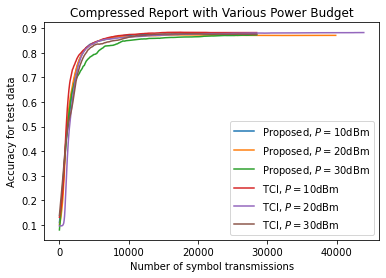

In [18]:
for i in range(len(acc_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']    
    acc_history = np.load(acc_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), acc_history[:epoch_max], label=legend_list[i])    
    
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Accuracy for test data')
plt.legend(loc='lower right')
plt.title('Compressed Report with Various Power Budget')
plt.show()

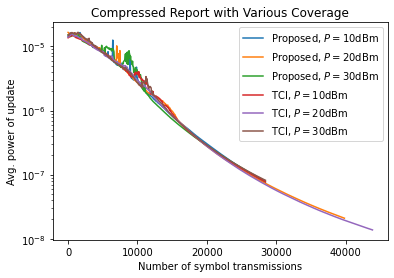

In [20]:
for i in range(len(rho_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']    
    rho_history = np.load(rho_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), rho_history[:epoch_max], label=legend_list[i])        
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Avg. power of update')
plt.yscale("log")
plt.legend(loc='upper right')
plt.title('Compressed Report with Various Coverage')
plt.show()

In [10]:
acc_list = ['../shared/results/Accuracy/[2021-08-26]Acc_CS_Acc0.9062CmpRate0.1Dmax400CU400P100.0.npy']
env_list = ['../shared/results/Simulation_Env/[2021-08-26]Sim_CS_Acc0.9062CmpRate0.1Dmax400CU400P100.0.npz']
rho_list = ['../shared/results/RHO/[2021-08-26]RHO_CS_Acc0.9062CmpRate0.1Dmax400CU400P100.0.npy']
legend_list = ['Proposed, $|\mathcal{M}_0|=400$','Proposed, $|\mathcal{M}_0|=10$', 'Proposed, $|\mathcal{M}_0|=50$','Proposed, $|\mathcal{M}_0|=200$',  'TCI, $|\mathcal{M}_0|=400$']

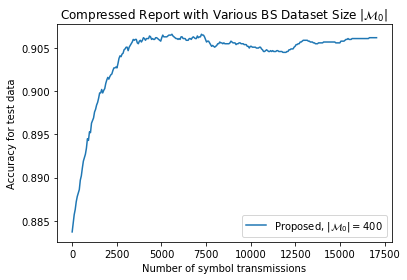

In [11]:
for i in range(len(acc_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']    
    acc_history = np.load(acc_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), acc_history, label=legend_list[i])    
    
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Accuracy for test data')
plt.legend(loc='lower right')
plt.title('Compressed Report with Various BS Dataset Size $|\mathcal{M}_0|$')
plt.show()

In [ ]:
for i in range(len(rho_list)):
    env = np.load(env_list[i])
    epoch_max = env['epoch_max']
    N = env['N']    
    rho_history = np.load(rho_list[i])
    plt.plot(np.arange(0,N*epoch_max, N ), rho_history, label=legend_list[i])        
plt.xlabel('Number of symbol transmissions')
plt.ylabel('Avg. power of update')
plt.yscale("log")
plt.legend(loc='upper right')
plt.title('Compressed Report with Various BS Dataset Size $|\mathcal{M}_0|$')
plt.show()

array(300)